---
---
---

# ✨ **TUTORIAL/CHALLENGE**: Engineering Visualizations with MatPlotLib ✨

In this challenge, you'll be walking through several basic, intermediate, and advanced cases of utilizing `matplotlib` and `seaborn` for comprehensive data visualization - with both real data and dummy cases to fully evaluate the libraries' usefulnesses.

---
---

DATASETS:

Students Performance [Zip File](https://drive.google.com/file/d/1JhJzqKlH5cdfTk1FE47lH-k6Jv9q1j8m/view?usp=sharing)

Netflix Dataset [Zip File](https://drive.google.com/file/d/1mnh-GHYeVK9DK2vhcS-aPRE1ZAXlPkv-/view?usp=sharing)

Titanic Dataset [Zip File](https://drive.google.com/file/d/1PNqGT9wCMIXUzbqiL_1LXOntu8jhXnQ6/view?usp=sharing)

#Matplotlib Website for Documentation

[Found Here](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.get_plot_commands.html)

## 💠 **PART ZERO**: Imports, Instantiations, and Custom Data Structures

We can start my importing relevant libraries and creating relevant data structures to work with for today.

Our target for today - of course - is the utilization of `matplotlib` and `seaborn` for multiple exploratory data analyses.

In [1]:
# Standard Data Analysis/Processing Libraries
import numpy as np
import pandas as pd

# Global MatPlotLib Visualization Toolset Library
import matplotlib as mpl

# Localized MatPlotLib Plotting Utilities
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 100

# Supporting Easy Visualization Library
# commented to resolve complex dep issue, sorry :)
# import seaborn as sns; sns.set_style("whitegrid")

To streamline our approach for this tutorialized challenge, we can import a majority of our to-be-used library functions and tools up front so that we can simply call them via their initialized namespace later on!

In [2]:
# Path-Tracing Tools for Line/Curve-Drawing
import matplotlib.path as mpath

# Tools for Text Imposition
from matplotlib.text import Text

# Line/Curve-Styling Tools
import matplotlib.lines as mlines

# Specialized Line-Drawing Utility
from matplotlib.lines import Line2D

# 2D Polygon-Drawing Tools
import matplotlib.patches as mpatches

# Grid Structuring Tools
import matplotlib.gridspec as gridspec

# 3D Plotting Utilities
from mpl_toolkits.mplot3d import Axes3D

# Tick Locating/Formatting Tools
from matplotlib.ticker import FuncFormatter

# Specialized Polygon Imposition Tools
from matplotlib.patches import Rectangle, Polygon

# Collection of Prebuilt Patch Objects
from matplotlib.collections import PatchCollection

**NOTE**: The following cells are hidden as to not immediately overwhelm you; it utilizes functional programming to construct mid-tier visualizations as a showcase.

You do not have to understand these functions... _yet_.

### 🔸 **Custom Functions** [*HIDDEN*]

The first major custom function is a helper function to instantiate the gridding space for visualization purposes.

In [3]:
def grid_segmenter(axes):
    """ Custom Function to Segment Grid of Plotting Object for Specific Polygons. """
    # Instantiate plotting segments for upper-left and lower-right grid spaces
    UPPER_LEFT_HALF = [(0,0), (0,1), (1,1)]
    LOWER_RIGHT_HALF = [(0,0), (1,0), (1,1)]
    # Cast segmented gridspaces as polygons for drawing objects/lines with color
    UpLePolygon = Polygon(UPPER_LEFT_HALF, closed=True, transform=axes.transAxes,
                        edgecolor="None", facecolor="None")
    LoRiPolygon = Polygon(LOWER_RIGHT_HALF, closed=True, transform=axes.transAxes,
                        edgecolor="None", facecolor="None")
    # Divide segmented gridspaces with black line and add to grid
    line = Line2D([0, 1], [0, 1], transform=axes.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=50)
    axes.add_artist(line)
    return UpLePolygon, LoRiPolygon

Following are several functions to produce custom visualizations, starting with a basic 2D line-drawing and/or curve-drawing plot.

In [4]:
def lineplot_generator(axes):
    """ Custom Function to Generate a Lineplot Using MatPlotLib Utilities. """
    # Setup Dummy Data for Curvical Lineplot Visualization
    X= np.linspace(-1,1,100); Y = 0.25 * np.cos(1 + np.pi * X)

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw Black 2D Curve Across Upper-Left Grid Segment
    axes.plot(X, Y, color="black", linewidth=2, clip_path=UpLePolygon)
    axes.fill_between(X, Y + 0.25, Y - 0.25, clip_path=UpLePolygon,
                      facecolor="black", edgecolor="None", alpha=0.15)

    # Draw Red 2D Curve Across Lower-Right Grid Segment
    axes.plot(X, Y, color="red", linewidth=2, clip_path=LoRiPolygon)
    axes.fill_between(X, Y + 0.25, Y - 0.25, clip_path=LoRiPolygon,
                      facecolor="red", edgecolor="None", alpha=0.15)

    # Draw Black Rectangular Outline as Polygon Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("LINEPLOT (2D)"); return

Next, we can build a basic scatter plot function.

In [5]:
def scatterplot_generator(axes):
    """ Custom Function to Generate a Scatterplot Using MatPlotLib Utilities. """
    # Setup Dummy Data & Config Parameters for Scatterplot Visualization
    np.random.seed(123); N, S = 500, 25
    X = np.random.normal(0, 0.5, N); Y = np.random.normal(0, 0.5, N)

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw Clustered Black Scatterpoints Across Upper-Left Grid Segment
    axes.scatter(X, Y, S, clip_path=UpLePolygon, linewidth=0.75,
                 facecolor="None",  edgecolor=".25")
    axes.scatter(X, Y, S, clip_path=UpLePolygon, linewidth=0.00,
                 facecolor="white", edgecolor="None")
    axes.scatter(X, Y, S/2, clip_path=UpLePolygon, linewidth=0.00,
                 facecolor="black", edgecolor="None", alpha=0.5)

    # Draw Clustered Red Scatterpoints Across Lower-Right Grid Segment
    axes.scatter(X, Y, S, clip_path=LoRiPolygon,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    axes.scatter(X, Y, S, clip_path=LoRiPolygon,
               linewidth=0.00, facecolor="white", edgecolor="None")
    axes.scatter(X, Y, S/2, clip_path=LoRiPolygon,
               linewidth=0.00, facecolor="red", edgecolor="None", alpha=0.5)

    # Draw Black Rectangular Outline as Polygon Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("SCATTERPLOT"); return

We can construct a "quiver plot" function, which produces a gradient of vectors in a graph.

In [6]:
def quiverplot_generator(axes):
    """ Custom Function to Generate a Quiverplot Using MatPlotLib Utilities. """
    # Setup Dummy Data & Config Parameters for Quiverplot Visualization
    N = 10; X, Y = np.mgrid[0:N, 0:N]
    X, Y = 2 * X / (N - 1) - 1, 2 * Y / (N - 1) - 1

    # Transform Dummy Data to Suitable Trigonometric Distributions for Visualization
    arctangent = np.arctan2(Y, X)
    X_directionalities, Y_directionalities = np.cos(arctangent), np.sin(arctangent)

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw Black Directional Vectors Across Upper-Left Grid Segment
    axes.quiver(X, Y, 0.1 * X_directionalities, 0.1 * Y_directionalities,
                scale=1, width=0.015, clip_path=UpLePolygon,
                edgecolor="black", facecolor=".9", linewidth=.5)

    # Draw Red Directional Vectors Across Upper-Right Grid Segment
    axes.quiver(X, Y, 0.1 * X_directionalities, 0.1 * Y_directionalities,
                arctangent - 1, scale=1, width=0.015, clip_path=LoRiPolygon,
                edgecolor="black", linewidth=.5, cmap="hot")

    # Draw Black Rectangular Outline as Polygon Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("QUIVERPLOT"); return

Next, we can write a contour plot, which produces a contour-like mapping visualization of 2D space.

In [7]:
def contourplot_generator(axes):
    """ Custom Function to Generate a Contourplot Using MatPlotLib Utilities. """
    # Setup Dummy Data & Config Parameters for Contourplot Visualization
    N = 100; X, Y = np.linspace(-3, 3, N), np.linspace(-3, 3, N)
    X, Y = np.meshgrid(X, Y)

    # Transform Dummy Data to Suitable 3D-Contoured Distributions for Visualization
    contours_ = (1 - X / 2 + X ** 5 + Y ** 3) * np.exp(-X ** 2 - Y ** 2)

    # Get Segmented Distances
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Retrieve & Impose Grayscale Filled Contours Across Upper-Left Grid Segment
    fillings = axes.contourf(contours_, 10, extent=[-1, +1, -1, +1], alpha=.5,
                             origin="upper", cmap="gray", zorder=-10)
    for collection in fillings.collections:
        collection.set_clip_path(UpLePolygon)

    # Retrieve & Impose Black Contour Boundaries Across Upper-Left Grid Segment
    boundaries = axes.contour(contours_, 10, extent=[-1, +1, -1, +1],
                              colors="black", linewidths=.5, origin="upper")
    for collection in boundaries.collections:
        collection.set_clip_path(UpLePolygon)

    # Retrieve & Impose Viridis-Scaled Contour Boundaries Across Lower-Right Grid Segment
    fillings = axes.contourf(contours_, 10, extent=[-1, +1, -1, +1], alpha=.75,
                             origin="upper", cmap="inferno", zorder=-10)
    for collection in fillings.collections:
        collection.set_clip_path(LoRiPolygon)

    # Retrieve & Impose White Contour Boundaries Across Lower-Right Grid Segment
    boundaries = axes.contour(contours_, 10, extent=[-1, +1, -1, +1],
                              colors="white", linewidths=.5, origin="upper")
    for collection in boundaries.collections:
        collection.set_clip_path(LoRiPolygon)

    # Draw Black Rectangular Outline as Polygon Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("CONTOURPLOT"); return

We can visualize the same type of data from a contour plot as a heatmap-like visualization using the following function.

In [8]:
def continuous_heatmap_generator(axes):
    """ Custom Function to Generate a Continuous Heatmap Using MatPlotLib Utilities. """
    # Setup Dummy Data & Config Parameters for Contourplot Visualization
    N = 100; X, Y = np.linspace(-3, 3, N), np.linspace(-3, 3, N)
    X, Y = np.meshgrid(X, Y)

    # Transform Dummy Data to Suitable 3D-Contoured Distributions for Visualization
    contours_ = (1 - X / 2 + X ** 5 + Y ** 3) * np.exp(-X ** 2 - Y ** 2)

    # Get Segmented Distances
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw Continuous Grayscale Heatmap Distributions Across Upper-Left Grid Segment
    axes.imshow(contours_, extent=[-1, +1, -1, +1], origin="upper", zorder=50,
                cmap="gray", interpolation="nearest", clip_path=UpLePolygon)

    # Draw Continuous Warm-Scaled Heatmap Distributions Across Lower-Right Grid Segment
    axes.imshow(contours_, extent=[-1, +1, -1, +1], origin="upper",
                cmap="hot", interpolation="bicubic", clip_path=LoRiPolygon)

    # Draw Black Rectangular Outline as Polygon Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("HEATMAP (CONTINUOUS)"); return

We can also produce a custom pie chart visualizer function, as shown below.

In [9]:
def pieplot_generator(axes):
    """ Custom Function to Generate a Pieplot Using MatPlotLib Utilities. """
    # Setup Config Parameters for Pieplot Visualization
    SIZE, SLICES = 0.3, np.array([[60., 32.], [37., 40.], [29., 10.]])

    # Get Segmented Distances
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Instantiate Grayscale Color Mapping Across Pieplot Slices in Upper-Left Grid Segment
    CMAP = plt.get_cmap("gray")
    outer_colors = CMAP(.1 + np.arange(3) / 4)
    inner_colors = CMAP(np.array([1, 2, 5, 6, 9, 10]) / 12)

    # Produce Gray Proportionate Patches for Configured Outer-Layer Pieplot Slices
    GrOuPatches, _ = axes.pie(SLICES.sum(axis=1), radius=1, colors=outer_colors,
                          wedgeprops=dict(width=SIZE, edgecolor="w"))
    for GrOuPatch in GrOuPatches:
        GrOuPatch.set_clip_on(True)
        GrOuPatch.set_clip_path(UpLePolygon)

    # Produce Gray Proportionate Patches for Configured Inner-Layer Pieplot Slices
    GrInPatches, _ = axes.pie(SLICES.flatten(), radius=1 - SIZE, colors=inner_colors,
                              wedgeprops=dict(width=SIZE, edgecolor="w"))
    for GrInPatch in GrInPatches:
        GrInPatch.set_clip_on(True)
        GrInPatch.set_clip_path(UpLePolygon)

    # Instantiate Custom Color Mapping Across Pieplot Slices in Lower-Right Grid Segment
    CMAP = plt.get_cmap("tab20b")
    outer_colors = CMAP(+np.arange(3))
    inner_colors = CMAP(np.array([1, 2, 5, 6, 9, 10]))

    # Produce Custom Proportionate Patches for Configured Outer-Layer Pieplot Slices
    CuOuPatches, _ = axes.pie(SLICES.sum(axis=1), radius=1, colors=outer_colors,
                              wedgeprops=dict(width=SIZE, edgecolor="w"))
    for CuOuPatch in CuOuPatches:
        CuOuPatch.set_clip_on(True)
        CuOuPatch.set_clip_path(LoRiPolygon)

    # Produce Custom Proportionate Patches for Configured Inner-Layer Pieplot Slices
    CuInPatches, _ = axes.pie(SLICES.flatten(), radius=1 - SIZE, colors=inner_colors,
                              wedgeprops=dict(width=SIZE, edgecolor="w"))
    for CuInPatch in CuInPatches:
        CuInPatch.set_clip_on(True)
        CuInPatch.set_clip_path(LoRiPolygon)

    # Draw Black Rectangular Polygon as Outline Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("PIEPLOT"); return

Next, we can visualize 3D surfaces and planes in 2D space using some more complex functional code.

In [10]:
def surfaceplot_generator(axes):
    """ Custom Function to Generate a 3D Surface Using MatPlotLib Utilities. """
    # Setup Dummy Data & Config Parameters for Pieplot Visualization
    X, Y = np.meshgrid(np.linspace(-1, 1, 25), np.linspace(-1, 1, 25))
    Z = np.sin(5 * np.sqrt(X ** 2 + Y ** 2))
    axes.set_axis_off()
    axes.set_xlim(-1, 1), axes.set_ylim(-1, 1), axes.set_zlim(-2, 2)

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw 3D Gray Surface Across Upper-Left Grid Segment
    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="gray",
                      clip_path=UpLePolygon, linewidth=.25, edgecolor="black",
                      vmin=-1.5, vmax=1)

    # Draw 3D Reddish Surface Across Lower-Right Grid Segment
    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="magma",
                      clip_path=LoRiPolygon, linewidth=0, edgecolor="black",
                      vmin=-1.5, vmax=1)

    # Impose Linear Boundaries Around Visualization Gridspace
    boundary = Line2D([0, 1], [0, 1], transform=axes.transAxes, linewidth=0.5,
                      color="black", clip_on=False, zorder=10)
    axes.add_artist(boundary)

    # Draw Black Rectangular Polygon as Outline Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    title = Text(0.5, -0.025, "SURFACEPLOT (3D)", clip_on=False,
                 ha="center", va="top", transform=axes.transAxes)
    axes.add_artist(title)

Let's make a return to some basic visualizations using bar charts.

In [11]:
def barplot_generator(axes):
    """ Custom Function to Generate a Barplot Using MatPlotLib Visualization. """
    # Setup Dummy Data & Config Parameters for Pieplot Visualization
    N = 16; X = np.arange(N)
    Y1 = (1 - 0.25 * X / N) * np.random.uniform(0.25, 0.75, N)
    Y2 = (1 - 0.25 * X / N) * np.random.uniform(0.25, 0.75, N)

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Draw Randomized Light-and-Dark Gray Bars Across Upper-Left Grid Segment
    axes.bar(X, +Y1, 1, facecolor="#cccccc", edgecolor="white", clip_path=UpLePolygon)
    axes.bar(X, -Y2, 1, facecolor="#999999", edgecolor="white", clip_path=UpLePolygon)

    # Draw Randomized Light-and-Dark Red Bars Across Lower-Right Grid Segment
    axes.bar(X, +Y1, 1, facecolor="#ffaaaa", edgecolor="white", clip_path=LoRiPolygon)
    axes.bar(X, -Y2, 1, facecolor="#ff7777", edgecolor="white", clip_path=LoRiPolygon)

    # Define Axial Limitation to Restrict Boundaries
    axes.set_xlim(-1, N)

    # Draw Black Rectangular Polygon as Outline Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("BARPLOT")

And finally, we can produce a box-and-whiskers plot visualization, as shown below.

In [12]:
def boxplot_generator(axes):
    """ Custom Function to Generate a Boxplot Using MatPlotLib Visualization. """
    # Setup Dummy Data & Config Parameters for Boxplot Visualization
    N = 5; distribution = np.random.normal(0, .25, (100, N))

    # Get Segmented Gridspace
    UpLePolygon, LoRiPolygon = grid_segmenter(axes)

    # Instantiate Boxplot Schematics for Upper-Left Grid Segment
    UpLeBPlot = axes.boxplot(distribution, patch_artist=True)

    # Iteratively Curate Grayscale Boxplot Across Upper-Left Grid Segment
    for patch in UpLeBPlot["boxes"]:
        patch.set_facecolor("0.9")
    for line in UpLeBPlot["medians"]:
        line.set_color("black")
    for element in ["boxes", "medians", "whiskers", "caps", "fliers", "means"]:
        for item in UpLeBPlot[element]:
            item.set_clip_path(UpLePolygon)

    # Instantiate Boxplot Schematics for Lower-Right Grid Segment
    LoRiBPlot = axes.boxplot(distribution, patch_artist=True)

    # Iteratively Curate Red-Scaled Boxplot Across Lower-Right Grid Segment
    for patch in LoRiBPlot["boxes"]:
        patch.set_facecolor("0.9")
    for line in LoRiBPlot["medians"]:
        line.set_color("black")
    for element in ["boxes", "medians", "whiskers", "caps", "fliers", "means"]:
        for item in LoRiBPlot[element]:
            item.set_color("red")
            try:
                item.set_markerfacecolor("red"); item.set_markeredgecolor("red")
            except:
                pass
            item.set_clip_path(LoRiPolygon)

    # Define Axial Limitations to Restrict Boundaries
    axes.set_xlim(0, N + 1), axes.set_xticks([])

    # Draw Black Rectangular Polygon as Outline Across Visualization
    outline = Rectangle((0, 0), 1, 1, transform=axes.transAxes, linewidth=0.75,
                        edgecolor="black", facecolor="None", clip_on=False)
    axes.add_artist(outline)

    # Label Graph with Appropriate Title
    axes.set_xlabel("BOXPLOT"); return

### 🔹 **Intermediate Visualization Showcase**

Now that we've constructed a myriad of helper functions for intermediate visualization, let's use them below!

In [13]:
# Instantiate gridspace and plotting objects
figure, axes = plt.subplots(3, 3, figsize=(12, 12))

# Setup 3x3 gridded subplots
for ax in axes.ravel():
    ax.set(xticks=[], yticks=[], xlim=[-1, 1], ylim=[-1, 1])
axes[2, 2] = plt.subplot(339, projection="3d")

# Cast lineplot, scatterplot, and barplot as top row of subplots
lineplot_generator(axes[0, 0])
scatterplot_generator(axes[0, 1])
barplot_generator(axes[0, 2])

# Cast heatmap, contourplot, and boxplot as middle row of subplots
continuous_heatmap_generator(axes[1, 0])
contourplot_generator(axes[1, 1])
boxplot_generator(axes[1, 2])

# Cast quiverplot, pieplot, and surfaceplot as bottom row of subplots
quiverplot_generator(axes[2, 0])
pieplot_generator(axes[2, 1])
surfaceplot_generator(axes[2, 2])

# Save subplotted figures
plt.savefig("showcase.pdf")
plt.show()

/tmp/ipykernel_5899/1362039276.py:16: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in fillings.collections:
/tmp/ipykernel_5899/1362039276.py:22: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in boundaries.collections:
/tmp/ipykernel_5899/1362039276.py:28: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in fillings.collections:
/tmp/ipykernel_5899/1362039276.py:34: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in boundaries.collections:


AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'

Error in callback <function _draw_all_if_interactive at 0x7f2d23050e00> (for post_execute):


AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'

AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'

<Figure size 1200x1200 with 10 Axes>

These visualizations all have several key design choices that are less impactful for interpretability but more noteworthy for clearly showcasing how one can incorporate unique color schema and stylistic highlighting for various visualizations.

### 🔹 **Dataset Access**

Be sure to download the relevant three datasets from the Shared Course Drive before running the following cells.

In [ ]:
# Netflix Movies Dataset
netflix = pd.read_csv("netflix_titles.csv")

# Titanic Dataset
titanic = pd.read_csv("titanic.csv")

# Student Exam Performances Dataset
student = pd.read_csv("student_performances.csv")

## 💠 **PART ONE**: Alignments

**Alignments** allow for cleaner setup of the gridspace such that reading axes is made easier.

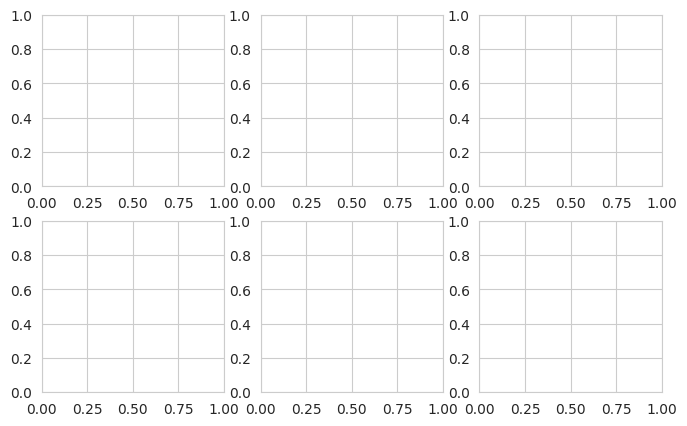

In [ ]:
# Instantiate gridspace and subplots in 3x2 format
figure, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

Let's examine how using in-built methods such as `.tight_layout()` can clean up our layout.

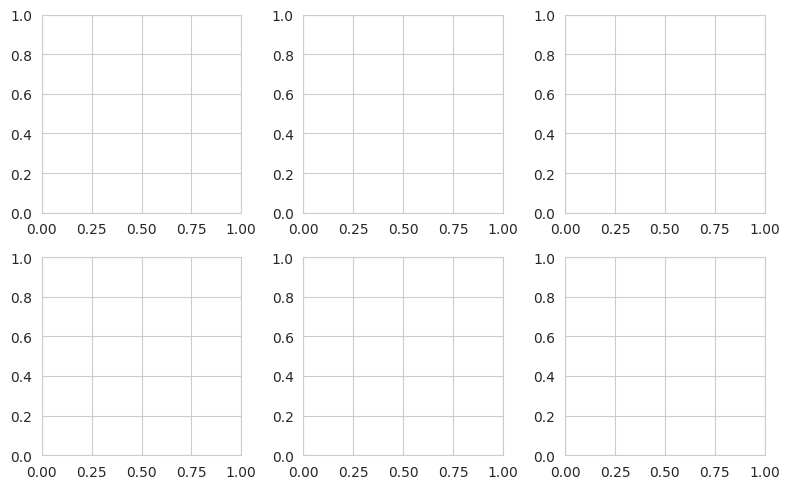

In [ ]:
# Instantiate gridspace and subplots in 3x2 format with tightened grids
figure, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

The gridspace itself is comprised with numerous gridding lines that are meant to allow for easy axial tracking.

However, it can also detract from the overall cleanliness of the visualization, so we can simply turn them off as needed.

Moreover, instantiating subplots up front allow us to place graphs across multiple pre-initialized portions of the grid, using methodic arguments such as `colspan` and `rowspan`.

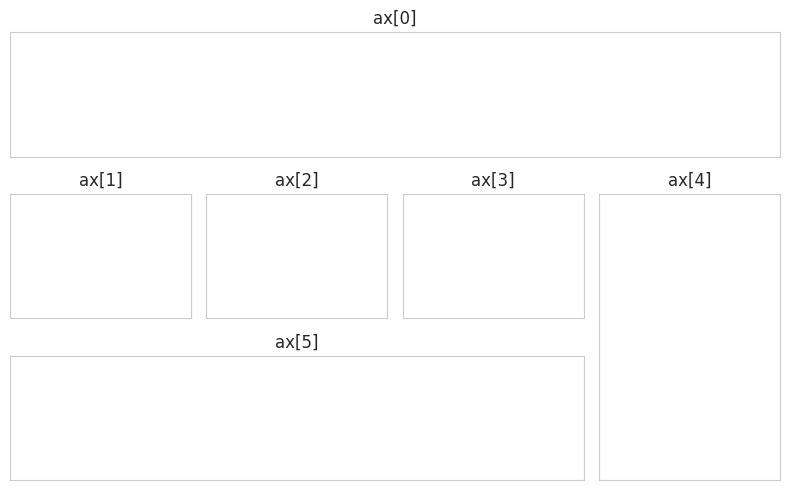

In [ ]:
# Initialize figure size of gridspace
figure = plt.figure(figsize=(8, 5))

# Instantiate axial subplots across gridspace
axes = [None for _ in range(6)]
        # [None, None, None, None, None, None]

# Span subplot across entire first row
axes[0] = plt.subplot2grid((3, 4), (0, 0), colspan=4)
# Span three subplots across middle row
axes[1] = plt.subplot2grid((3, 4), (1, 0), colspan=1)
axes[2] = plt.subplot2grid((3, 4), (1, 1), colspan=1)
axes[3] = plt.subplot2grid((3, 4), (1, 2), colspan=1)
# Span subplot across final column
axes[4] = plt.subplot2grid((3, 4), (1, 3), colspan=1, rowspan=2)
# Span subplot across final row
axes[5] = plt.subplot2grid((3, 4), (2, 0), colspan=3)


for iteration in range(6):
    # Impose iterative titles across each major subplot
    axes[iteration].set_title("ax[{}]".format(iteration))
    # Remove x-ticks and y-ticks
    axes[iteration].set_xticks([])
    axes[iteration].set_yticks([])

# Clean gridspace layout
figure.tight_layout()
plt.show()

---

### 📌 **REQUIRED CHALLENGE** 📌

> Now that you have a perspective of how to construct front-end-esque visualization templates, try and play around with that with the following activity.
>
> **Your challenge is to replicate and recreate the following infographic to the best of your ability using your knowledge of alignments using `matplotlib`.**
>
> ![Alignment Challenge](http://scipy-lectures.org/_images/sphx_glr_plot_gridspec_001.png)

---

In [ ]:
# TODO: Use this cell to complete the relevant required challenge!

---
---

## 💠 **PART TWO**: Colormaps

**Colormaps** are specialized data structures internal to data analysis and visualization libraries (namely `matplotlib` and `seaborn`).

They allow for multiple colorization options across different distributions and visualizations.

As such, it's important to take note of which colors work best to communicate the idea(s) that you're trying to convey.

In [ ]:
def colormap_visualizer(colormaps, title):
    """ Custom function to visualize selected colormaps as plots. """
    # Instantiate config parameters and plotting object for colormaps
    N = len(colormaps)
    figure = plt.figure(figsize=(8.25, N * 0.20), dpi=200)
    axes = plt.subplot(1, 1, 1, frameon=False, xlim=[0, 10], xticks=[], yticks=[])
    figure.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    # Set stepping and padding parameters for iterative visualization
    y, dy, padding = 0, 0.3, 0.08

    # Iteratively impose colormaps across single-plot gridspace
    ticks, labels = list(), list()
    for colormap in colormaps[::-1]:
        spectrum = np.linspace(0, 1, 512).reshape(1, 512)
        plt.imshow(spectrum, extent=[0, 10, y, y+dy], cmap=plt.get_cmap(colormap))
        ticks.append(y + dy / 2); labels.append(colormap)
        y += dy + padding

    # Adjust axial subplots
    axes.set_ylim(-padding, y)
    axes.set_yticks(ticks)
    axes.set_yticklabels(labels)
    axes.tick_params(axis="y", which="both", length=0, labelsize=5)
    plt.title("{} Colormap".format(title), fontweight="bold", fontsize=8)
    plt.show()

First, let's take a look at the sequential colormap, which generally intensifies continuous single-color or multi-color palettes.

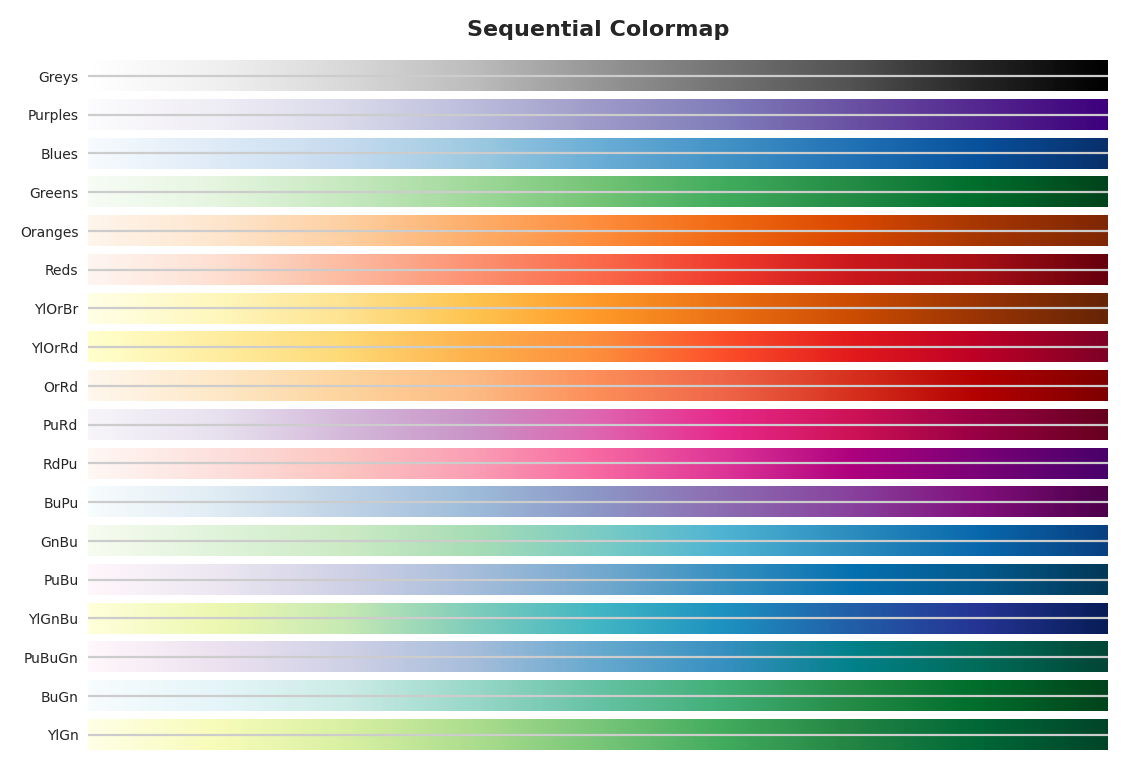

In [ ]:
SEQUENTIAL = ("Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
              "YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu",
              "GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn")

colormap_visualizer(SEQUENTIAL, "Sequential")

One alternate version of sequential color mapping is reserved for scientific and engineering visualizations, known as "perceptually uniform maps."

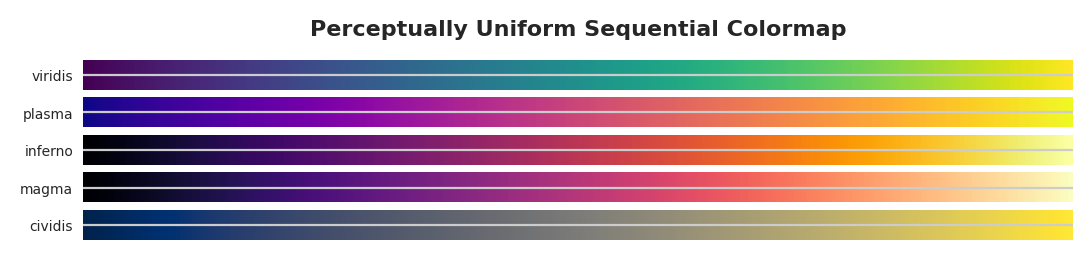

In [ ]:
PERCEPTUAL = ("viridis", "plasma", "inferno", "magma", "cividis")

colormap_visualizer(PERCEPTUAL, "Perceptually Uniform Sequential")

Additional alternate sequential color maps exist that boast more intense colors on average for more niche visualizations.

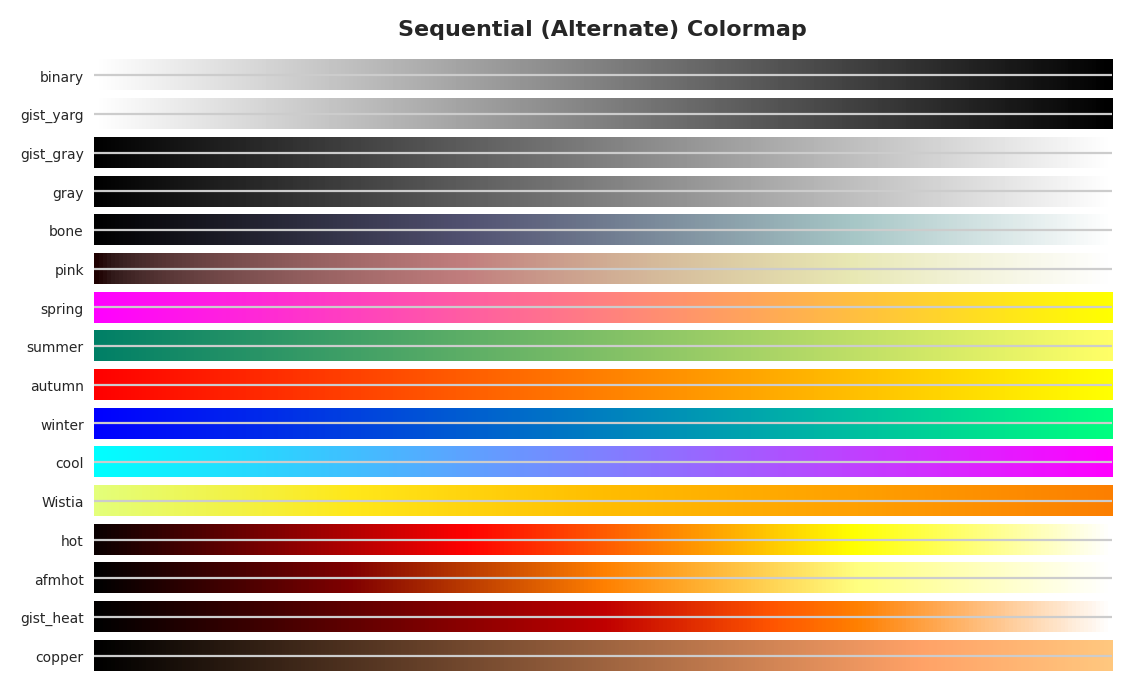

In [ ]:
SEQUENTIAL2 = ("binary", "gist_yarg", "gist_gray", "gray", "bone",
               "pink", "spring", "summer", "autumn", "winter", "cool",
               "Wistia", "hot", "afmhot", "gist_heat", "copper")

colormap_visualizer(SEQUENTIAL2, "Sequential (Alternate)")

Monotonic color gradients are displayed in diverging color palettes, which can be great for applications such as correlation maps and heatmaps, where multiple sequentially continuous colors need to be displayed.

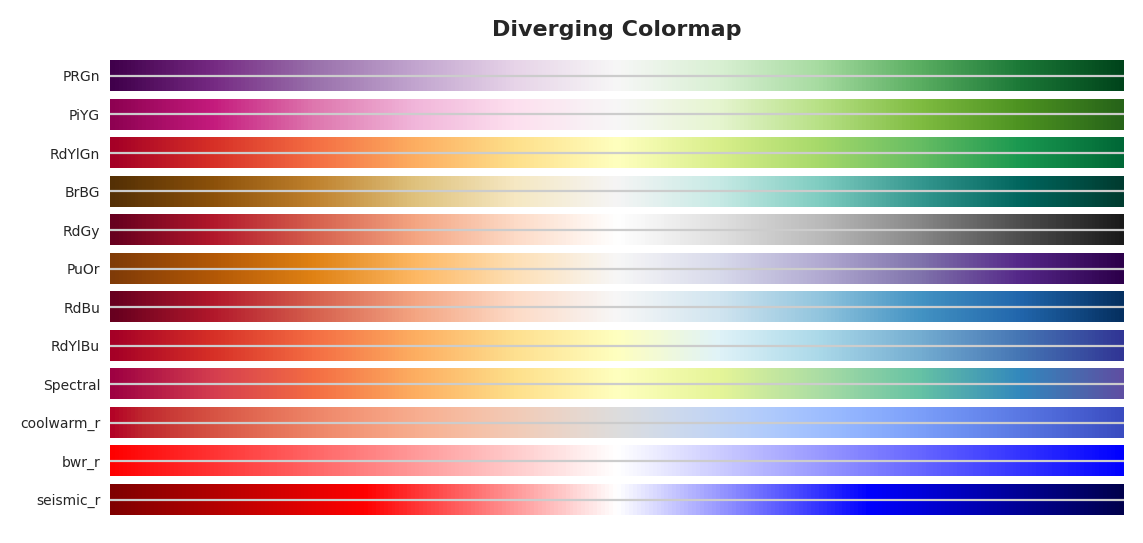

In [ ]:
DIVERGING = ("PRGn", "PiYG", "RdYlGn", "BrBG", "RdGy", "PuOr", "RdBu",
             "RdYlBu", "Spectral", "coolwarm_r", "bwr_r", "seismic_r")

colormap_visualizer(DIVERGING, "Diverging")

Cyclic colormaps allow us to start and end on the same color through a continuous color domain.

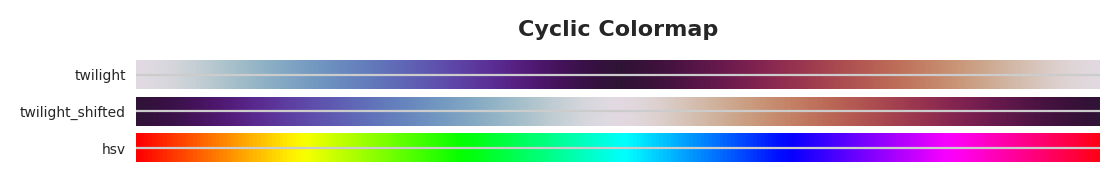

In [ ]:
CYCLIC = ("twilight", "twilight_shifted", "hsv")

colormap_visualizer(CYCLIC, "Cyclic")

Qualitative colormaps swap from a continuous color gradient to a more discretized domain.

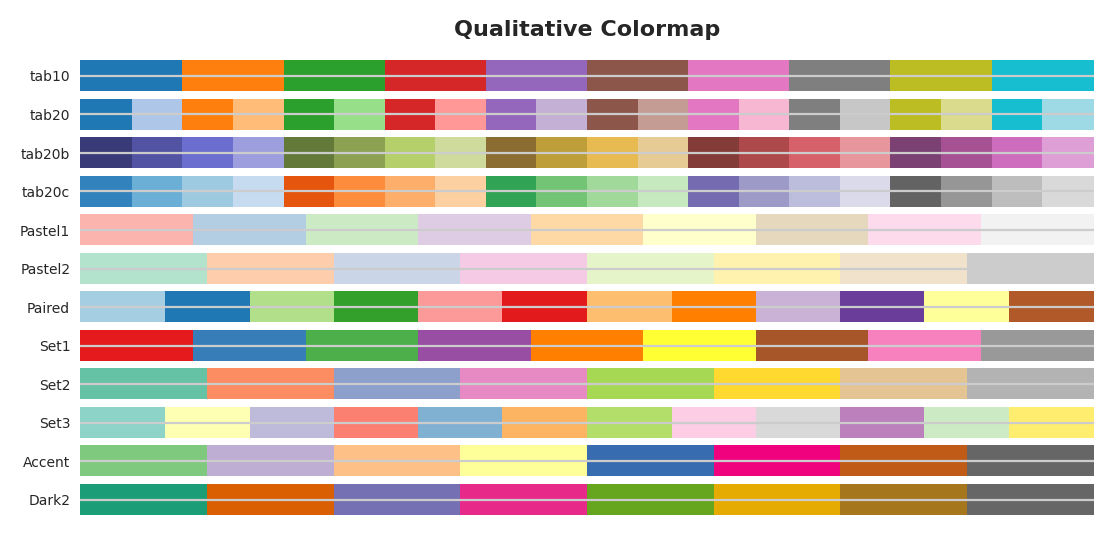

In [ ]:
QUALITATIVE = ("tab10", "tab20", "tab20b", "tab20c", "Pastel1", "Pastel2",
               "Paired", "Set1", "Set2", "Set3", "Accent", "Dark2")

colormap_visualizer(QUALITATIVE, "Qualitative")

And finally, there exist a miscellaneous collection of assorted colormaps that are uniquely designed for niche purposes - it's best to use them sparingly and for domains that reflect their design.

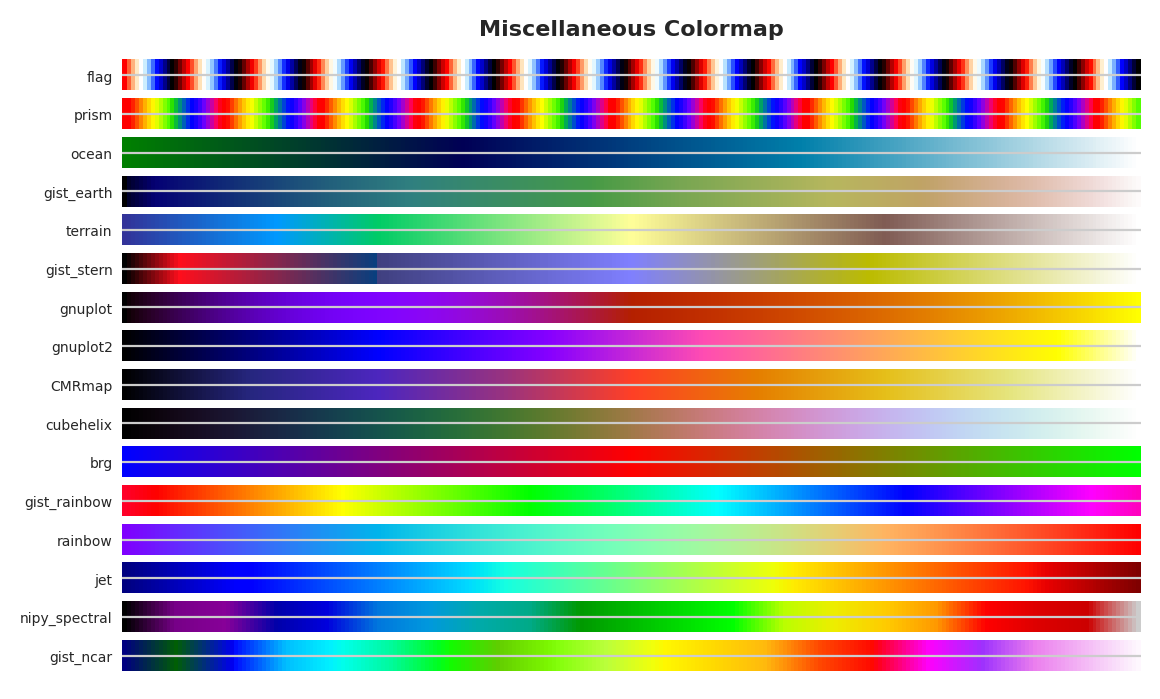

In [ ]:
MISCELLANEOUS = ("flag", "prism", "ocean", "gist_earth", "terrain",
                 "gist_stern", "gnuplot", "gnuplot2", "CMRmap",
                 "cubehelix", "brg", "gist_rainbow", "rainbow", "jet",
                 "nipy_spectral", "gist_ncar")

colormap_visualizer(MISCELLANEOUS, "Miscellaneous")

In order to assess these colormaps in action, let's apply colorization across the _Netflix Titles_ dataset.

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
""" Netflix Visualization Activity: PART 1/2. """

# Set Data Structure with All Months
MONTHS = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]

# Curate Netflix Dataset to Retrieve Datetime Data as Unique Features
dates = netflix[["date_added"]].dropna()
dates["year"] = dates["date_added"].apply(lambda date: date.split(", ")[-1])
dates["month"] = dates["date_added"].apply(lambda date: date.lstrip().split(" ")[0])
dates = dates.groupby("year")["month"].value_counts().unstack().fillna(0)[MONTHS].T

In [ ]:
dates

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,44.0,72.0,130.0,162.0,228.0,117.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,16.0,84.0,88.0,159.0,117.0,0.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,140.0,175.0,179.0,152.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,95.0,118.0,171.0,188.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0


Now that we have a semi-processed dataset, we can utilize one of the colormaps to visualize the intensity (degree) of Netflix content updates per month from 2008 to 2021.

For the sake of this exercise, we'll utilize the **`Reds`** color palette to create a visualization reminiscent of Netflix's own company color palette.

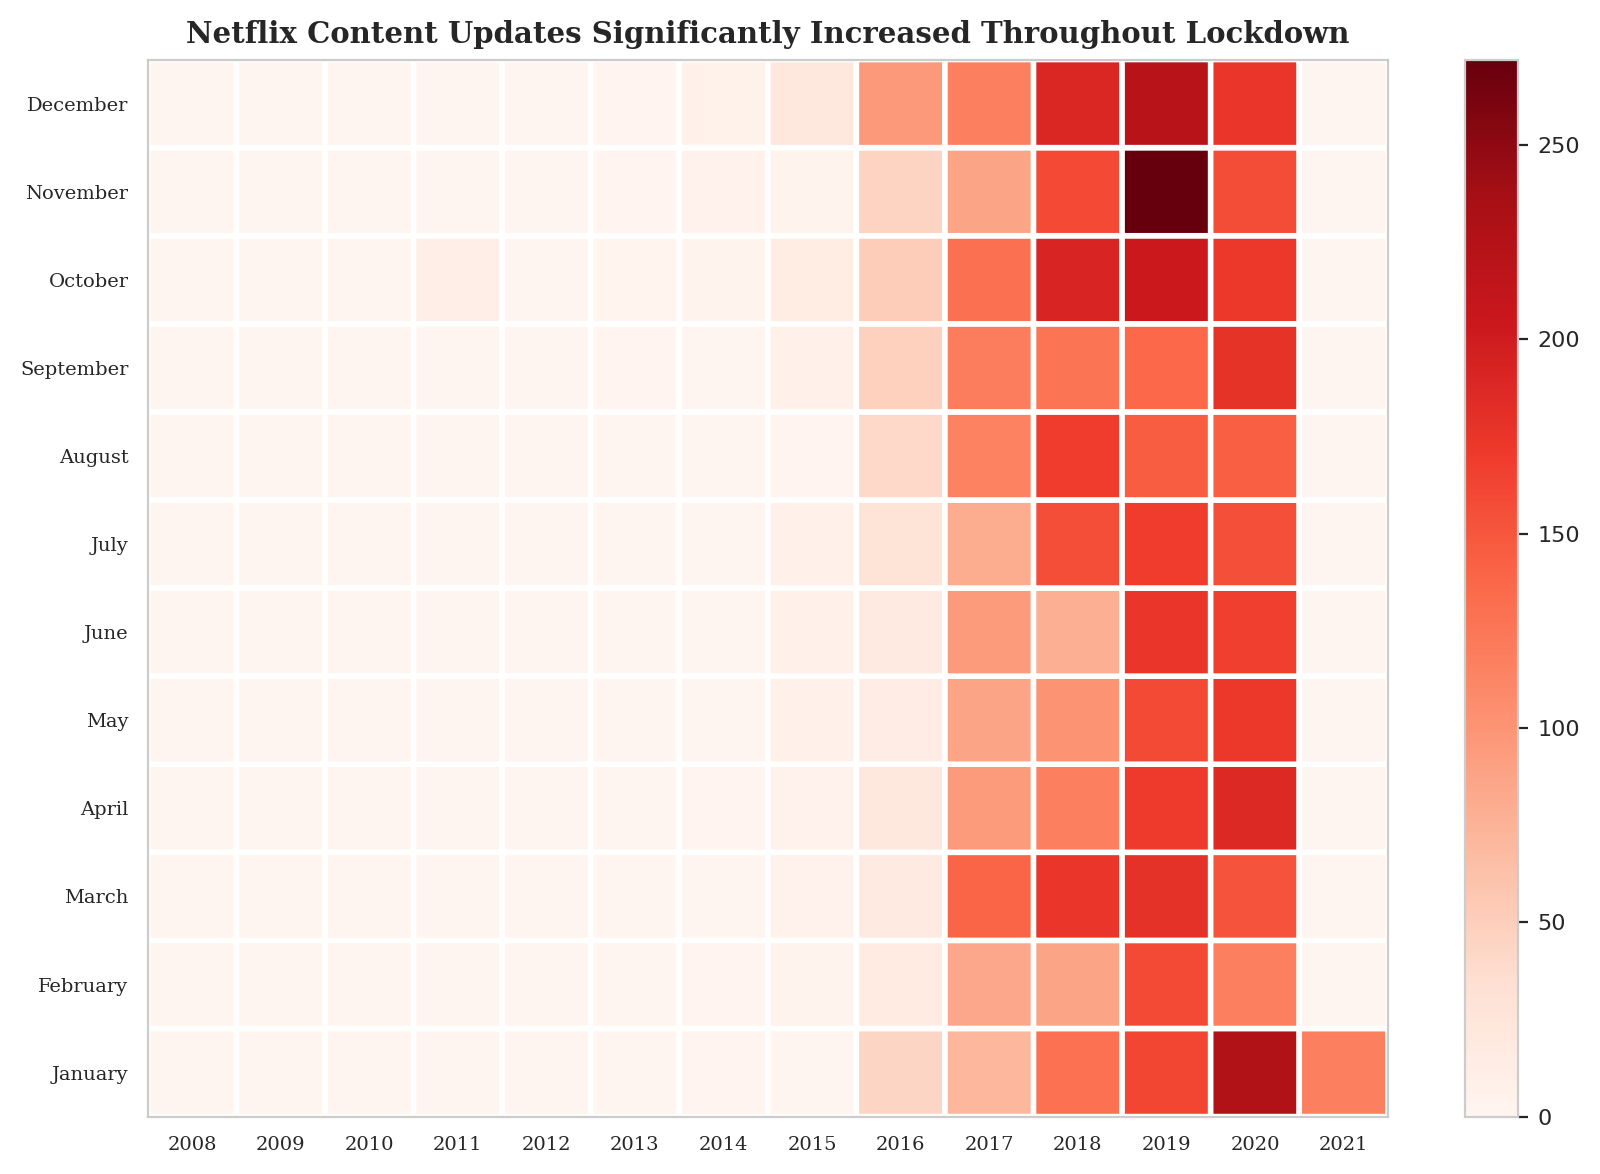

In [ ]:
""" Netflix Visualization Activity: PART 2/2. """

# Instantiate plotting gridspace and config parameters
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(dates, cmap="Reds", edgecolors="white", linewidths=2)
plt.xticks(np.arange(0.5, len(dates.columns), 1), dates.columns, fontsize=7, fontfamily="serif")
plt.yticks(np.arange(0.5, len(dates.index), 1), dates.index, fontsize=7, fontfamily="serif")
plt.title("Netflix Content Updates Significantly Increased Throughout Lockdown",
          fontsize=10.5, fontfamily="serif", fontweight="bold")

# Impose color bar and cast visualization
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
plt.show()

Not too bad!

We can clearly visualize the intensity of content updates across Netflix's platform increase considerably in 2018-2019 and continue increasing throughout the pandemic lockdown period.

---
---

## 💠 **PART THREE**: Text, Annotations, and Patches

We can impose additional annotations and adjustments onto plotting figures in the form of added texts and **patches**, which can be shapes, colors, and even images/GIFs to add additional context/metadata relevantly.

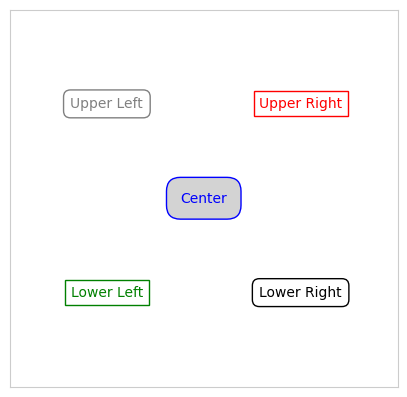

In [ ]:
# Setup configuration plotting variables
figure, axes = plt.subplots(figsize=(5, 5), dpi=100)

# Impose colorized patches with annotated text across plot
axes.text(0.25, 0.75, "Upper Left", color="gray", va="center", ha="center",
          bbox=dict(facecolor="none", edgecolor="gray", boxstyle="round, pad=0.5"))
axes.text(0.75, 0.75, "Upper Right", color="red", va="center", ha="center",
          bbox=dict(facecolor="none", edgecolor="red"))
axes.text(0.5, 0.5, "Center", color="blue", va="center", ha="center",
          bbox=dict(facecolor="lightgray", edgecolor="blue", boxstyle="round, pad=1.0"))
axes.text(0.25, 0.25, "Lower Left", color="green", va="center", ha="center",
          bbox=dict(facecolor="none", edgecolor="green"))
axes.text(0.75, 0.25, "Lower Right", color="black", va="center", ha="center",
          bbox=dict(facecolor="none", edgecolor="black", boxstyle="round, pad=0.5"))

# Remove Axial Ticks and Display Visualization
axes.set_xticks([])
axes.set_yticks([])
plt.show()

Patches can come in all different forms, shapes, and sizes - so long as we know how to construct them iteratively.

In [ ]:
def title_imposer(grid, title):
    """ Impose title of patch near existing patch. """
    plt.text(grid[0], grid[1] - 0.15, title, ha="center",
             family="sans-serif", size=14)

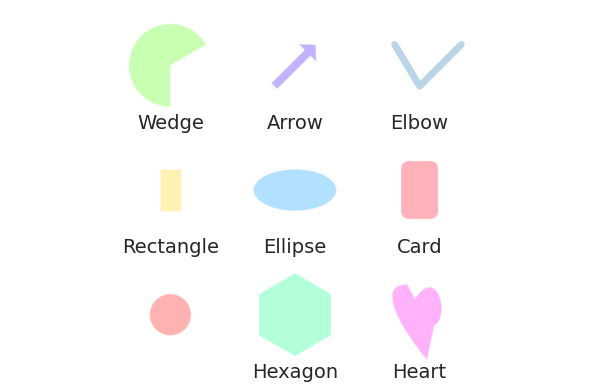

In [ ]:
# Instantiate plotting gridspace and configuration
figure, axes = plt.subplots()

# Create 3x3 grid to plot artists/patches
grid, patches = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T, list()

# Impose a circular patch across the gridspace
circle = mpatches.Circle(grid[0], 0.05, ec="none")
patches.append(circle)
patcher(grid[0], "Circle")

# Impose a rectangular patch across the gridspace
rectangle = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rectangle); patcher(grid[1], "Rectangle")

# Impose a wedge-like patch across the gridspace
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge); patcher(grid[2], "Wedge")

# Impose a hexagonal patch across the gridspace
hexagon = mpatches.RegularPolygon(grid[3], 6, 0.1)
patches.append(hexagon); patcher(grid[3], "Hexagon")

# Impose an elliptical patch across the gridspace
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse); patcher(grid[4], "Ellipse")

# Impose an arrow-like patch across the gridspace
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05,
                       0.1, 0.1, width=0.1)
patches.append(arrow); patcher(grid[5], "Arrow")

# Impose a custom heart-shaped patch across the gridspace
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
heart = mpatches.PathPatch(path)
patches.append(heart); patcher(grid[6], "Heart")

# Impose a custom card-like patch across the gridspace
card = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(card); patcher(grid[7], "Card")

# Impose an elbow-like corner patch across the gridspace
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
elbow = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
patcher(grid[8], "Elbow")

# Curate colors across nine patches using initialized color map
colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
axes.add_collection(collection)
axes.add_line(elbow)

# Impute axial configurations
plt.axis("equal"); plt.axis("off")
plt.tight_layout(); plt.show()

As you can see, there's some decent creative range available for custom patch development - particularly regarding the custom drawing objects, such as the heart and the card.

---
---

## 💠 **PART FOUR**: Details and Examples

Go through the following examples of programmatic extensions of data visualization for the Titanic, Netflix, and Student Assessment datasets.

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10 * i :
            return f'under {i*10}'

In [ ]:
titanic['Age Brackets'] = titanic['Age'].apply(age_band)
titanic_ages = titanic[['Age Brackets', 'Survived']].groupby('Age Brackets')['Survived'].value_counts().sort_index().unstack().fillna(0)

titanic_ages['Survived'] = titanic_ages[1] / (titanic_ages[0] + titanic_ages[1]) * 100

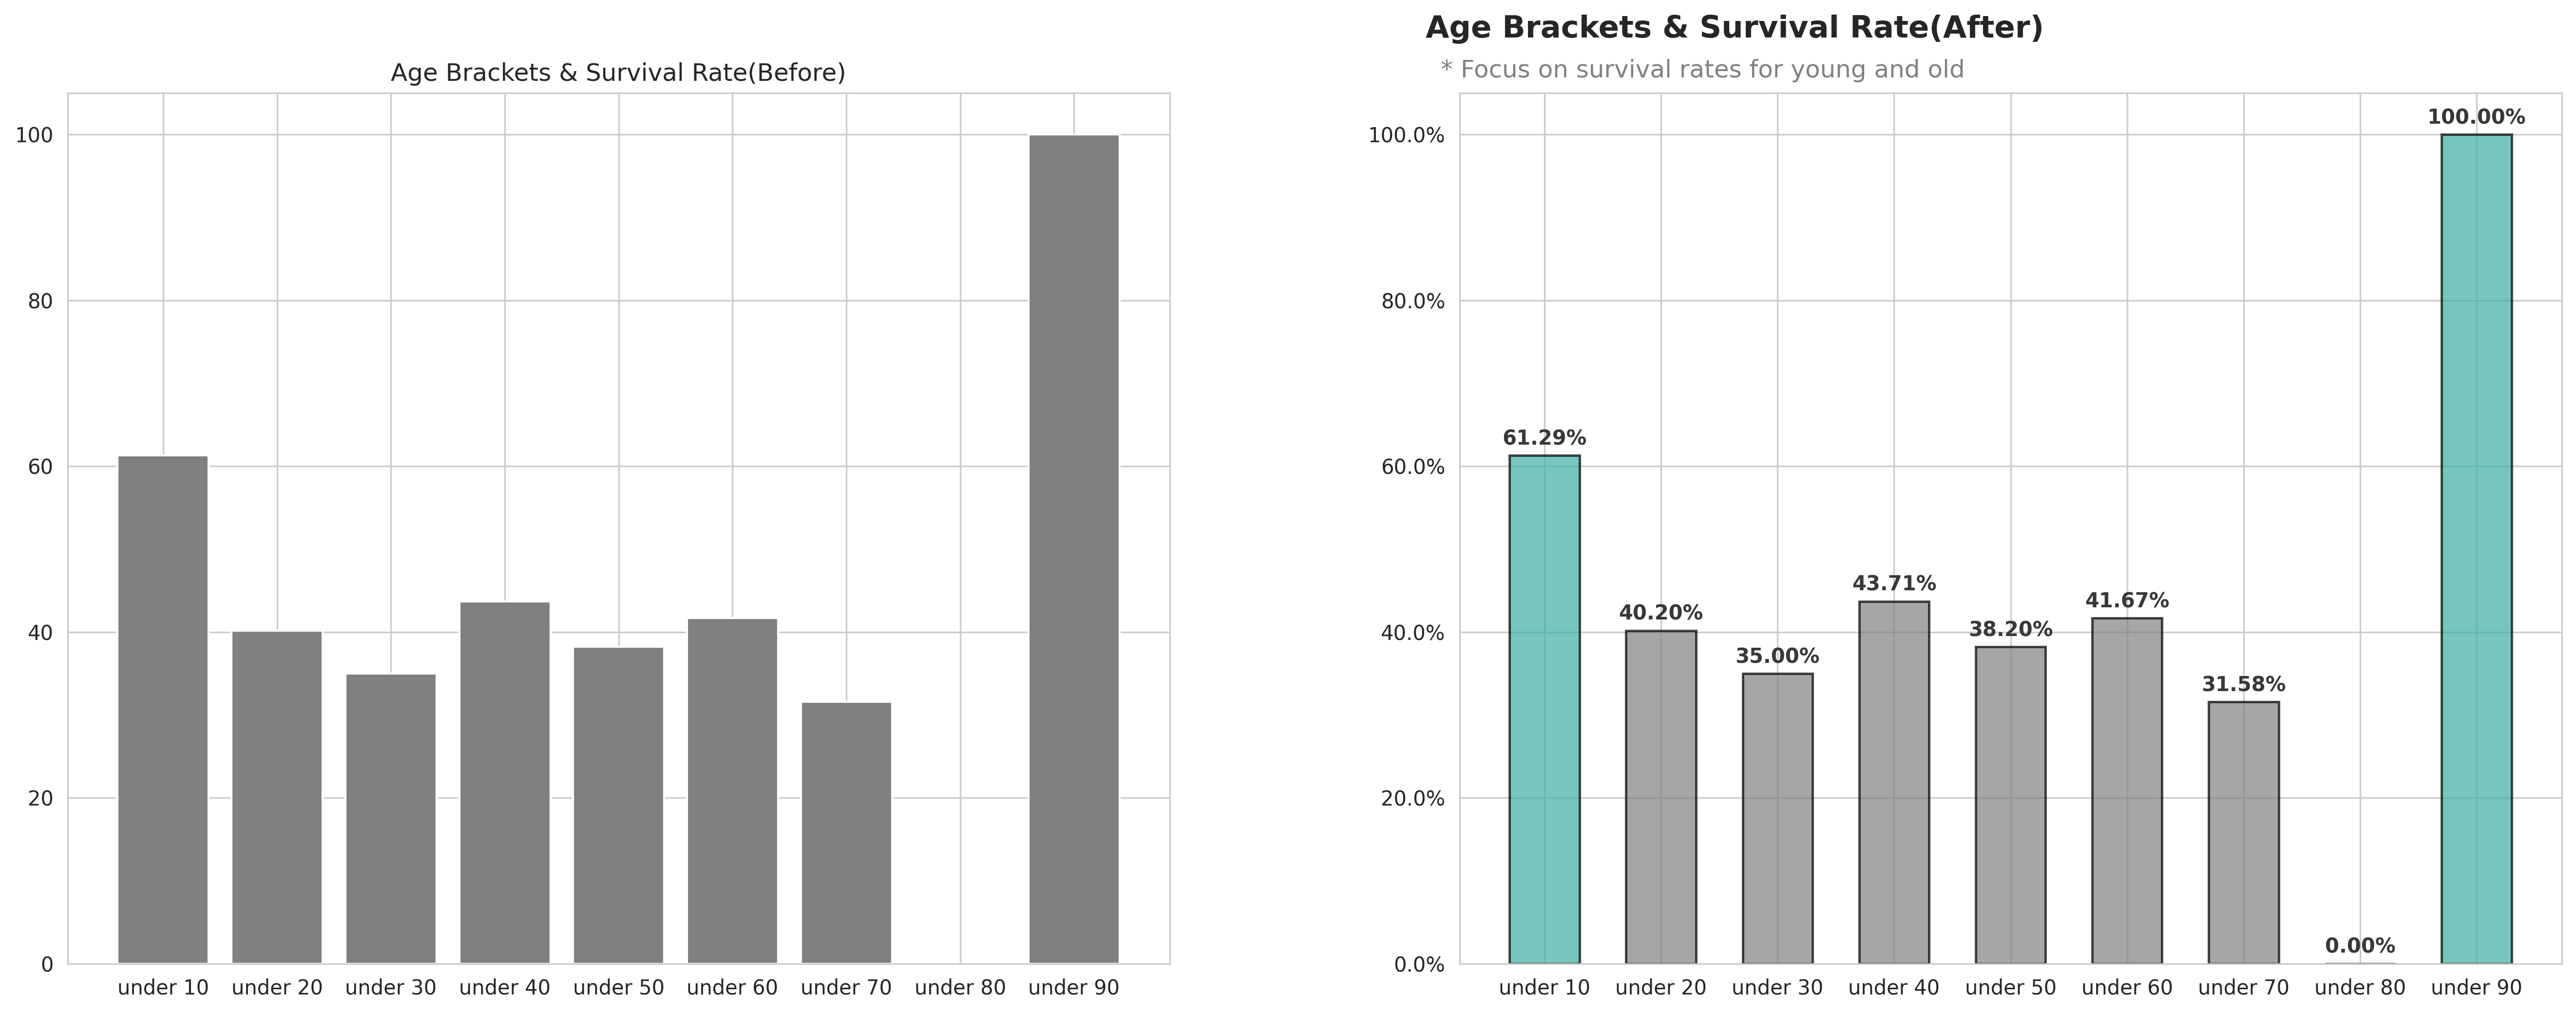

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

ax[0].bar(titanic_ages['Survived'].index, titanic_ages['Survived'], color='gray')
ax[0].set_title('Age Brackets & Survival Rate(Before)')

color_map = ['gray' for _ in range(9)]
color_map[0] = color_map[8] = '#3caea3'
ax[1].bar(titanic_ages['Survived'].index, titanic_ages['Survived'], alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax[1].set_title('Age Brackets & Survival Rate(After)', fontsize=15, fontweight='bold', position=(0.25, 1.0+0.05))
for i in titanic_ages['Survived'].index:
    ax[1].annotate(f"{titanic_ages['Survived'][i]:.02f}%",
                   xy=(i, titanic_ages['Survived'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838'
                  )

ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%'))
plt.suptitle('* Focus on survival rates for young and old', x=0.65, y=0.94, color='gray')
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

---
---

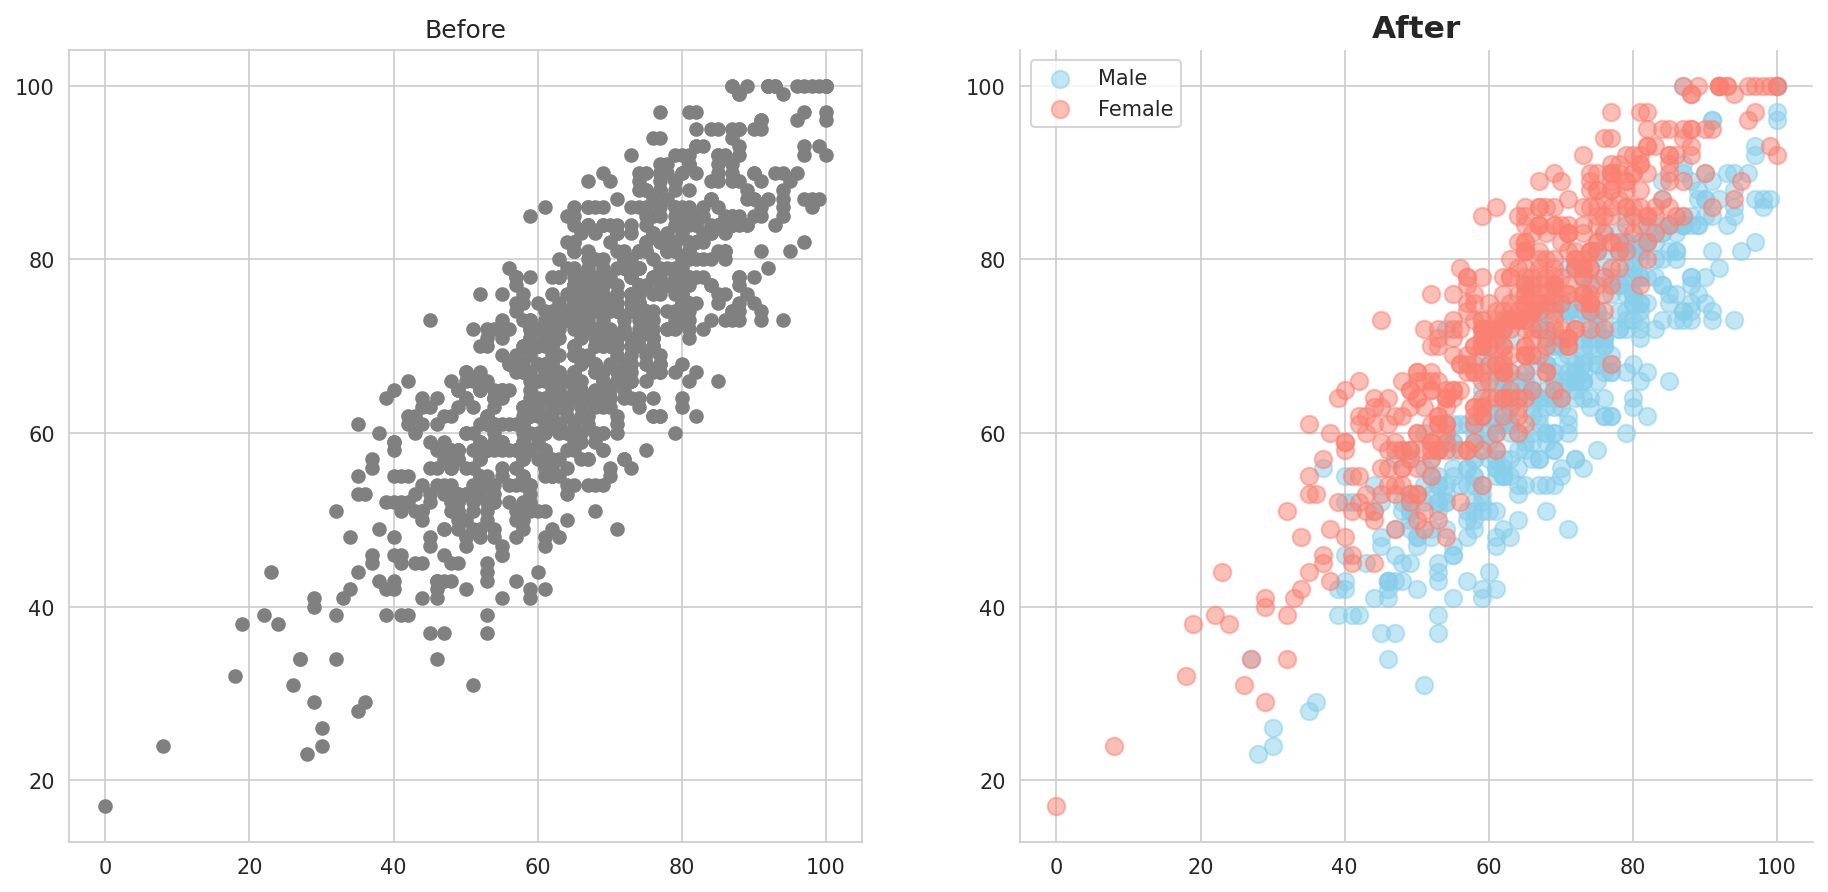

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=student, color='gray')
ax[0].set_title('Before')

ax[1].scatter(x='math score', y='reading score',data=student[student['gender']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=student[student['gender']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

---
---

In [ ]:
movies = netflix[netflix["type"] == "Movie"]
ratings =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rated_movies = movies['rating'].value_counts()[ratings]

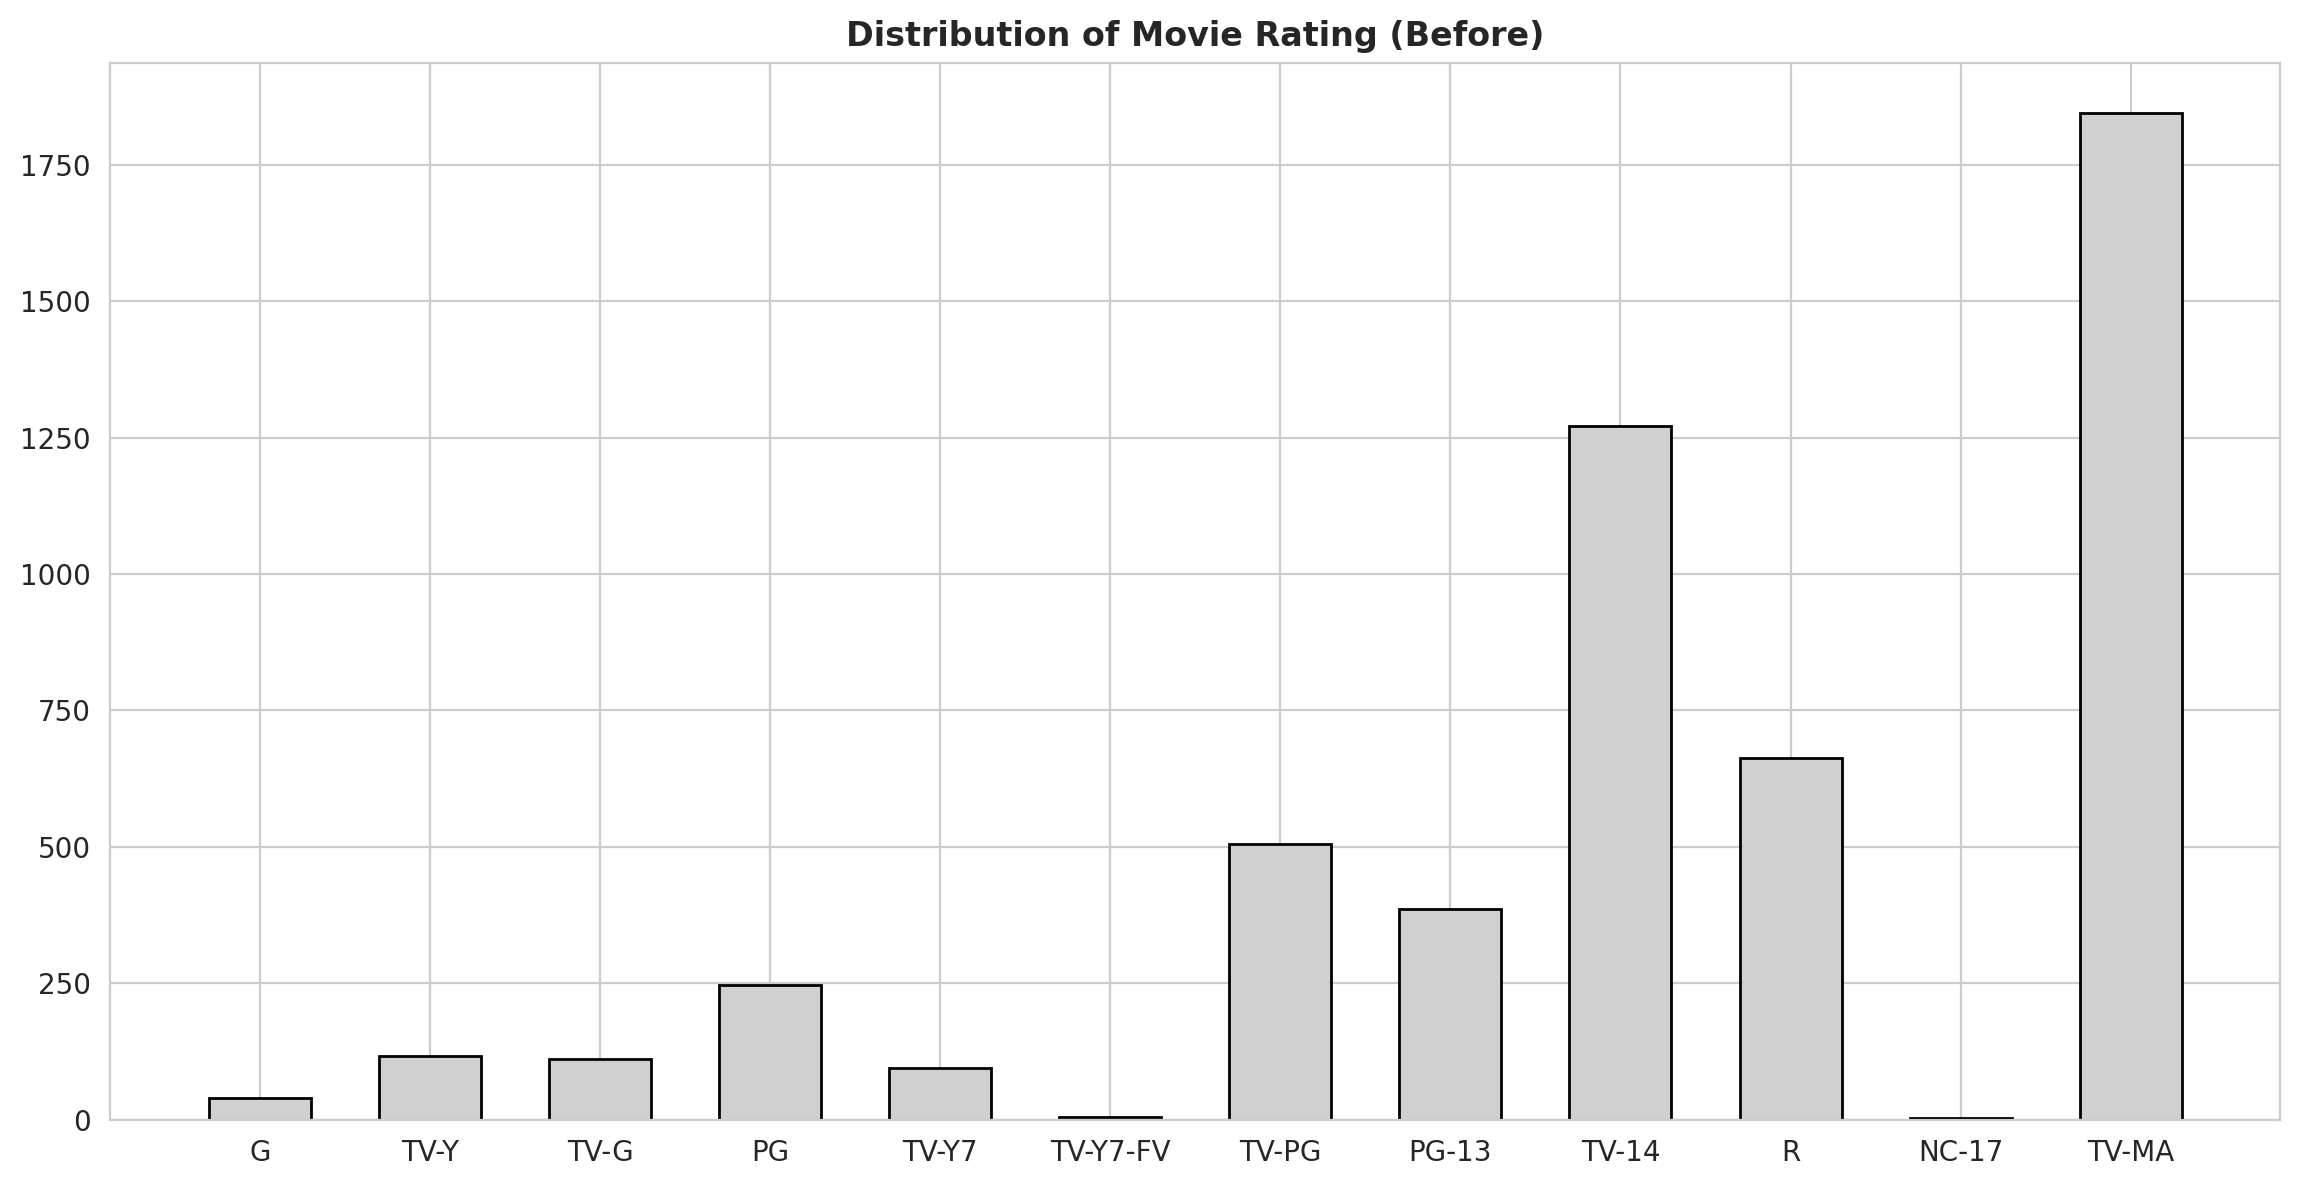

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(rated_movies.index, rated_movies, color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating (Before)', fontweight='bold')
plt.show()

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()

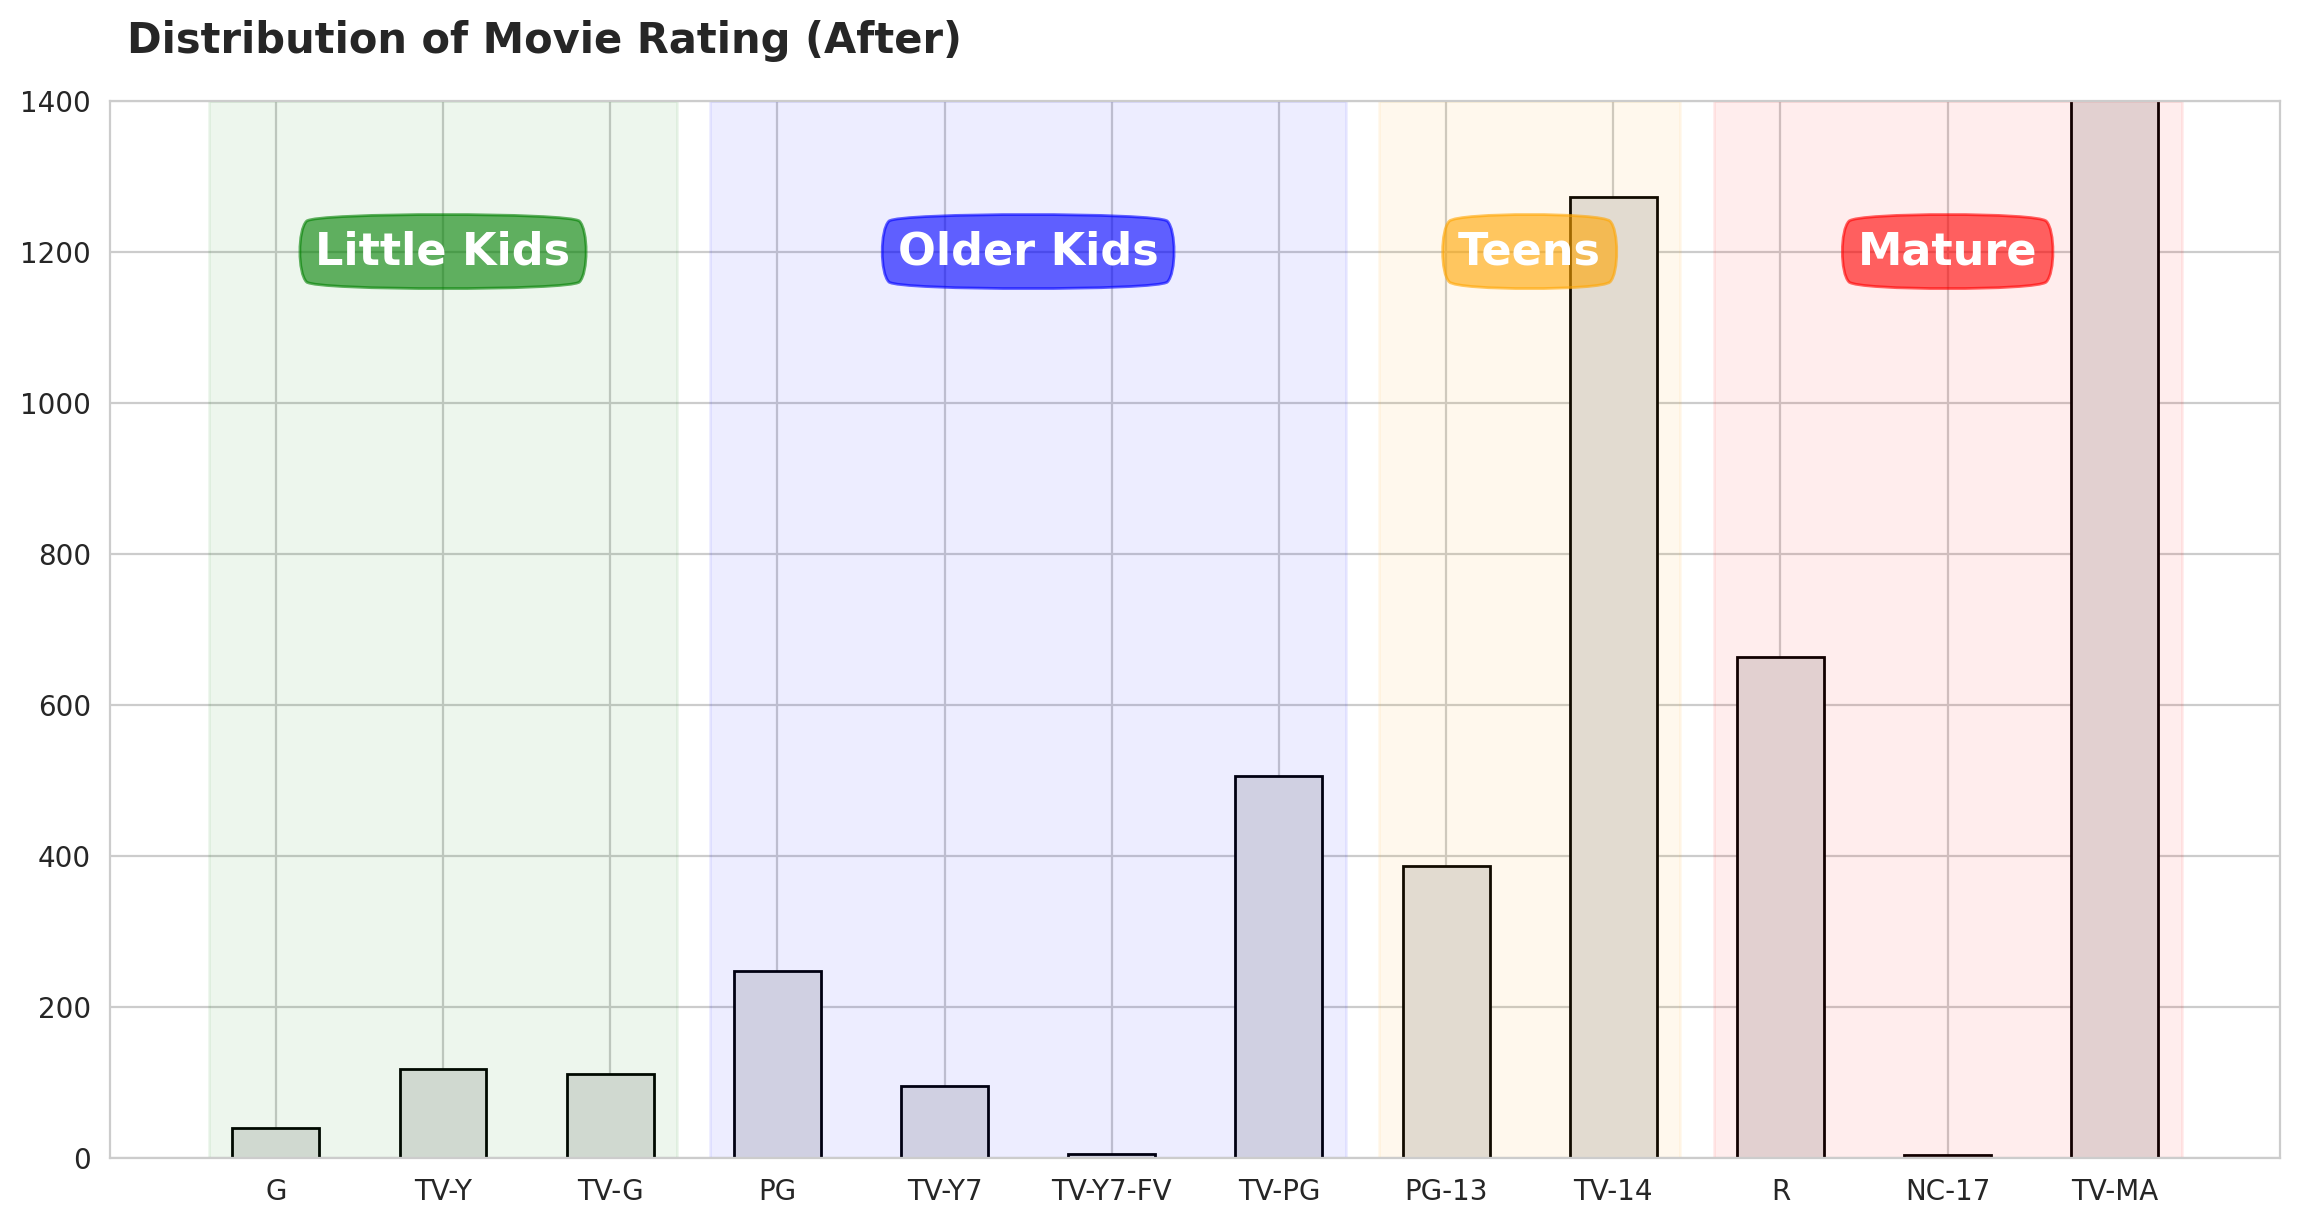

In [ ]:
rating_barplot(rated_movies,'Movie', 1200, 1400)

---
---

[Web Link to actual comic](https://xkcd.com/418/)


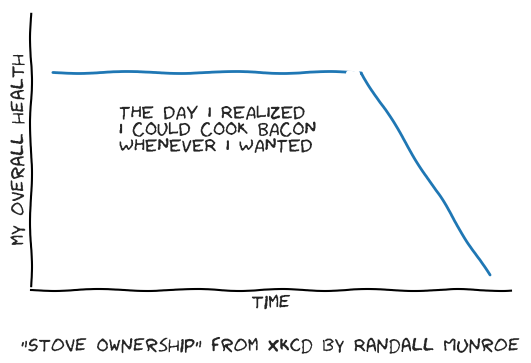

In [ ]:
with plt.xkcd():
  fig = plt.figure()
  ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_ylim([-30, 10])

  data = np.ones(100)
  data[70:] -= np.arange(30)

  ax.annotate(
      'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
      xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

  ax.plot(data)

  ax.set_xlabel('time')
  ax.set_ylabel('my overall health')
  fig.text(
      0.5, 0.05,
      '"Stove Ownership" from xkcd by Randall Munroe',
      ha='center')

[Web Link to Second Comic Strip](https://xkcd.com/373/)

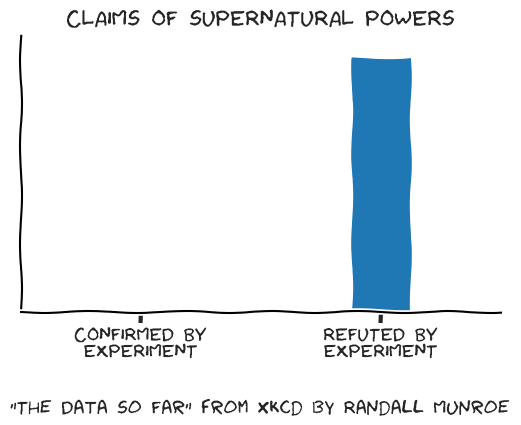

In [ ]:
with plt.xkcd():
  fig = plt.figure()
  ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
  ax.bar([0, 1], [0, 100], 0.25)
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.set_xticks([0, 1])
  ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
  ax.set_xlim([-0.5, 1.5])
  ax.set_yticks([])
  ax.set_ylim([0, 110])

  ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

  fig.text(
      0.5, -0.05,
      '"The Data So Far" from xkcd by Randall Munroe',
      ha='center')

---

### 📌 **REQUIRED CHALLENGE** 📌

> As a challenge, let's have some fun!
>
> **Your challenge is to produce your own visualization incorporating a color map, patch, or heatmap while also incorporating an element of Matplotlib not incorporated above. You can feel free to visualize data from the three preloaded datasets, or you can simply make up your own data/scenario to showcase like the examples above!**
>
> If you choose to go with the latter, be creative! Feel free to fool around and see what you can do with the styling of this format. This is an exercise to try and implement Matplotlib visuals yourself!

---

In [ ]:
# TODO: Use this cell to complete the final required challenge!

---
---
---